In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# importing the dataset
train = pd.read_csv('Original Dataset/Corona_NLP_train.csv', encoding='latin-1')
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
test=pd.read_csv("Original Dataset/Corona_NLP_test.csv",encoding='latin1')
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
df=pd.concat([train,test])

In [ ]:
print('Shape of the Training Set = {}'.format(train.shape))
print('Shape of the Test Set = {}'.format(test.shape))

Shape of the Training Set = (41157, 6)
Shape of the Test Set = (3798, 6)


In [ ]:
print('Total tweets in this data: {}'.format(df.shape[0]))
print('Total Unique Users in this data: {}'.format(df['UserName'].nunique()))

Total tweets in this data: 44955
Total Unique Users in this data: 44955


In [ ]:
print('Total tweets in Training Set: {}'.format(train.shape[0]))
print('Total Unique Users in Training Set: {}'.format(train['UserName'].nunique()))

Total tweets in Training Set: 41157
Total Unique Users in Training Set: 41157


In [ ]:
print('Total tweets in Test Set: {}'.format(test.shape[0]))
print('Total Unique Users in Test Set: {}'.format(test['UserName'].nunique()))

Total tweets in Test Set: 3798
Total Unique Users in Test Set: 3798


In [ ]:
df.Sentiment.value_counts(normalize=True)

Positive              0.275142
Negative              0.243755
Neutral               0.185341
Extremely Positive    0.160672
Extremely Negative    0.135091
Name: Sentiment, dtype: float64

In [ ]:
# copying the original tweets in another column
df['text'] = df.OriginalTweet
train['text'] = train.OriginalTweet
test['text'] = test.OriginalTweet

In [ ]:
# converting classes from 5 to 3
def classes_def(x):
    if x ==  "Extremely Positive":
        return "positive"
    elif x == "Extremely Negative":
        return "negative"
    elif x == "Negative":
        return "negative"
    elif x ==  "Positive":
        return "positive"
    else:
        return "neutral"
    
df['sentiment']=df['Sentiment'].apply(lambda x:classes_def(x))
train['sentiment']=train['Sentiment'].apply(lambda x:classes_def(x))
test['sentiment']=test['Sentiment'].apply(lambda x:classes_def(x))
target=df['sentiment']

df.sentiment.value_counts(normalize= True)

positive    0.435814
negative    0.378846
neutral     0.185341
Name: sentiment, dtype: float64

In [ ]:
# creating class distribution
class_df = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='Pastel2')

,sentiment,text
2,positive,19592
0,negative,17031
1,neutral,8332


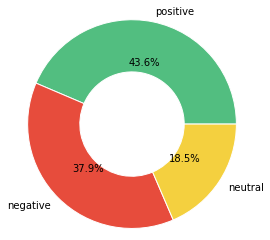

In [ ]:
percent_class=class_df.text
labels= class_df.sentiment

colors = ['#52BE80', '#E74C3C', '#F4D03F']

my_pie,_,_ = plt.pie(percent_class, radius = 1.2, labels=labels, colors=colors, autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Average word length in each tweet in training data')

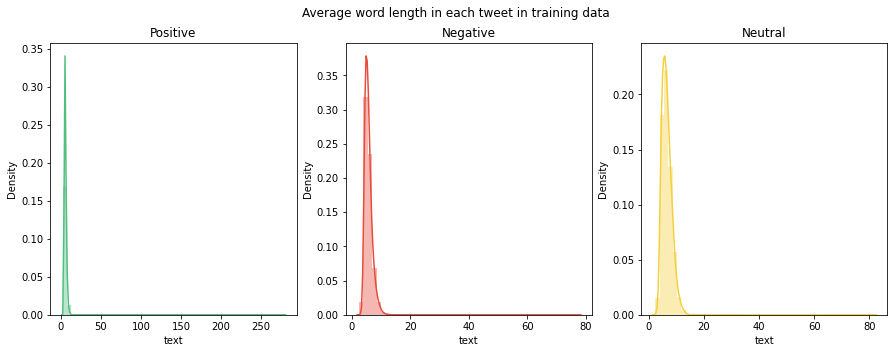

In [ ]:
fig,(ax1,ax2, ax3)=plt.subplots(1,3,figsize=(15,5))

word=train[train['sentiment']=="positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='#52BE80')
ax1.set_title('Positive')


word=train[train['sentiment']=="negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='#E74C3C')
ax2.set_title('Negative')

word=train[train['sentiment']=="neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='#F4D03F')
ax3.set_title('Neutral')


fig.suptitle('Average word length in each tweet in training data')

In [ ]:
# text corpus
corpus = []
for x in df['text'].str.split():
    for i in x:
        corpus.append(i)

In [ ]:
from collections import Counter 

In [ ]:
# getting count of each word in the corpus
counter=Counter(corpus)
most=counter.most_common()

In [ ]:
x=[]
y=[]
for word,count in most[:50]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

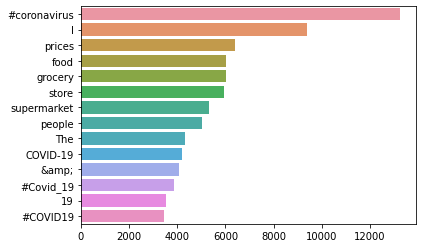

In [ ]:
# common words
sns.barplot(x=y,y=x)

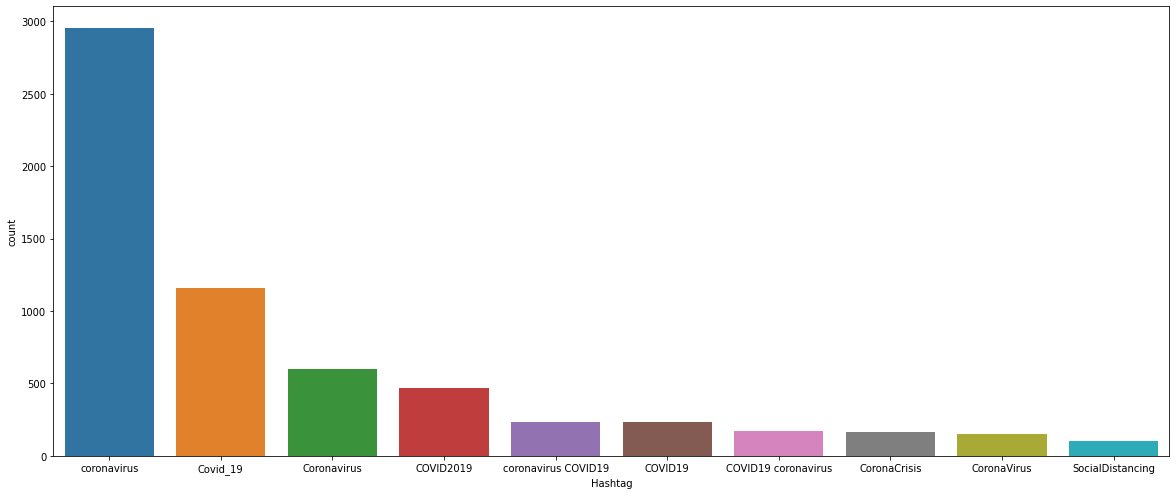

In [ ]:
# common hashtags
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)

df['hash'] = df['text'].apply(lambda x:find_hash(x))
temp = df['hash'].value_counts()[:][1:11]
temp = temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
fig, ax = plt.subplots(figsize=(20, 8.27))
sns.barplot(ax=ax, x="Hashtag",y="count", data = temp)

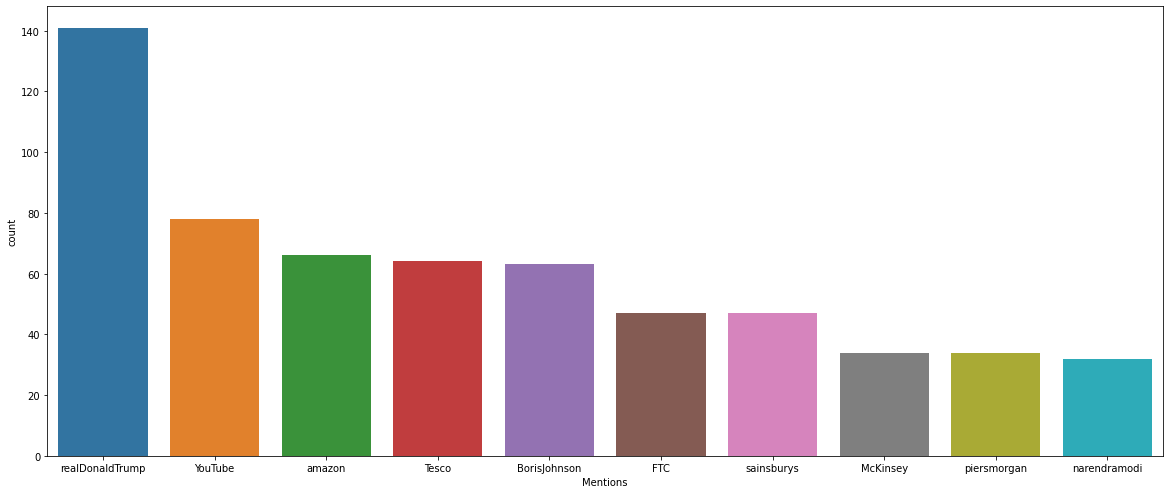

In [ ]:
# common mentions
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
df['mentions']=df['text'].apply(lambda x:mentions(x))

temp=df['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})
fig, ax = plt.subplots(figsize=(20, 8.27))
sns.barplot(x="Mentions",y="count", data = temp)

In [ ]:
# Pre-processing
# Removing Urls and HTML links from the tweets
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
df['text_new']=df['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['text']=df['text_new'].apply(lambda x:remove_html(x))

In [ ]:
# lower casing the text
def lower(text):
    low_text= text.lower()
    return low_text
df['text_new']=df['text'].apply(lambda x:lower(x))

In [ ]:
# number removal
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
df['text']=df['text_new'].apply(lambda x:remove_num(x))

In [ ]:
# remove stopwords and punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
df['text_new']=df['text'].apply(lambda x:punct_remove(x))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text']=df['text_new'].apply(lambda x:remove_stopwords(x))

In [ ]:
# remove mentions and hashtags
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
df['text_new']=df['text'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
df['text']=df['text_new'].apply(lambda x:remove_hash(x))

# removing extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
df['text_new']=df['text'].apply(lambda x:remove_space(x))

df = df.drop(columns=['text_new'])

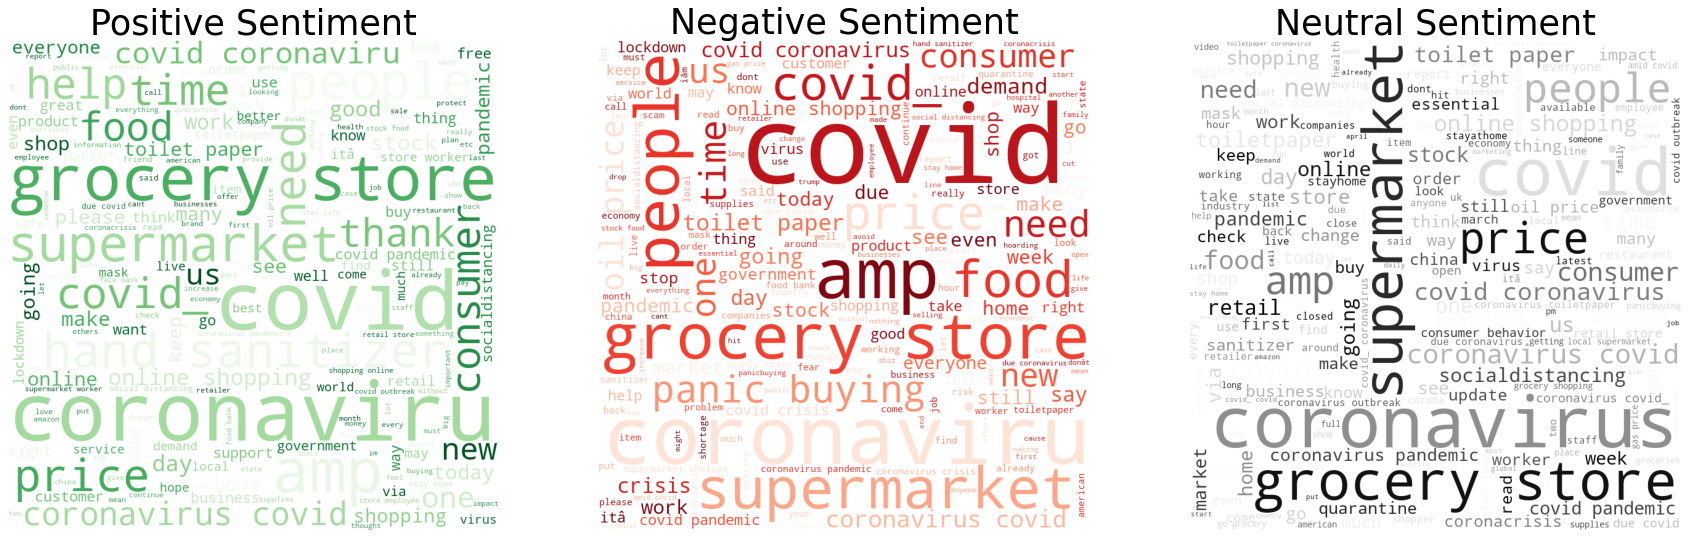

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = df[df["sentiment"]=="positive"]
df_neg = df[df["sentiment"]=="negative"]
df_neu = df[df["sentiment"]=="neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral Sentiment',fontsize=35);

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text,sentiment,hash,mentions
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv,neutral,,MeNyrbie Phil_Gahan Chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,positive,,
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,positive,,
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,positive,COVID19france COVID_19 COVID19 coronavirus con...,
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreak im paranoi...,negative,COVID19 coronavirus CoronavirusFrance restezch...,


In [ ]:
# Positive = 2, Negative = 1, Neutral = 0
def classes_def_val(x):
    if x ==  "positive":
        return 2
    elif x == "negative":
        return 1
    else:
        return 0
    
df['senti']=df['sentiment'].apply(lambda x:classes_def_val(x))

In [ ]:
train = df[df['UserName'].isin(train['UserName'].values)]
test = df[df['UserName'].isin(test['UserName'].values)]

In [ ]:
# print(train.shape)
# print(test.shape)
# Saving the pre-processed dataset for further use
# train.to_csv('Pre-processed Dataset/train.csv')
# test.to_csv('Pre-processed Dataset/test.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

# transforming each text into a vector
features = tfidf.fit_transform(train.text)

labels = train.senti

print("Each of the %d tweets is represented by %d features" %(features.shape))

Each of the 41157 tweets is represented by 10615 features


In [ ]:
labels.unique()

array([0, 2, 1])

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5),
    LinearSVC(),
    MultinomialNB(),
]

# 5 fold Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.784411,0.004532
MultinomialNB,0.659791,0.003452
RandomForestClassifier,0.470029,0.003683


In [ ]:
features_test = tfidf.transform(test.text)
labels_test = test.senti

model = LinearSVC()
model.fit(features, labels)
labels_pred = model.predict(features_test)

In [ ]:
# Classification report

from sklearn import metrics

print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(labels_test, labels_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.65      0.62      0.63       619
           1       0.81      0.80      0.80      1633
           2       0.81      0.83      0.82      1546

    accuracy                           0.78      3798
   macro avg       0.76      0.75      0.75      3798
weighted avg       0.78      0.78      0.78      3798

